# Problem Statement -

Identifying the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers.
This has to be done in two steps-

1. Descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.
2. For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

# Analysis of basic metrics-

In [4]:
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv('aerofit_treadmill.csv')

In [7]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


- Product Purchased: The product purchased out the 3 options - KP281, KP481, or KP781
- Age: In years
- Gender: Male/Female
- Education: In years
- MaritalStatus: Single or partnered
- Usage: The average number of times the customer plans to use the treadmill each week.
- Income: Annual income (in dollars)
- Fitness: Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.
- Miles: The average number of miles the customer expects to walk/run each week

Observations-
- There are 9 columns and 180 entries in the data. Shape - (180, 9)
- Columns Product, Gender and MaritalStatus are of 'object' datatype. Columns Age, Education, Usage, Fitness, Income and Miles are of 'int64' datatype.
- There are no null values in the data.

In [12]:
df.shape

(180, 9)

Statistical summary-

In [8]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


- Mean age of users is close to 29 years. Median is 26 years.
- Mean years of education is around 15.6 years. Median is 16 years.
- Mean income of users is 53,719 dollars. Median is 50,596 dollars.

In [10]:
df.nunique()

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

We see that gender and MaritalStatus have only 2 unique value.

Converting Gender and MaritalStatus to categorical datatype-

In [16]:
df['Gender'] = df['Gender'].astype('category')
df['MaritalStatus'] = df['MaritalStatus'].astype('category')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    object  
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(2), int64(6), object(1)
memory usage: 10.5+ KB


# Non-Graphical analysis

In [18]:
df.nunique()

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

There are only 3 unique products, 32 unique ages and so on.

Let's see the number of entries with different values-

In [19]:
df['Product'].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

There are 80 KP281 purchases, 60 KP481(s) and 40 KP781(s).

In [22]:
df['Age'].value_counts().head(10)   # Displaying only 10 of the 32 ages.

25    25
23    18
26    12
24    12
28     9
33     8
35     8
30     7
38     7
22     7
Name: Age, dtype: int64

There are 25 users of age 25, 18 users of age 23, 12 users of age 26 and so on.

In [23]:
df['Gender'].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

104 male users and 76 female users.

In [24]:
df['Education'].value_counts()

16    85
14    55
18    23
15     5
13     5
21     3
12     3
20     1
Name: Education, dtype: int64

85 people with 16 years of education, 55 with 14 years, 23 with 18 years etc.

In [25]:
df['MaritalStatus'].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

107 partnered users, 73 single users.

In [26]:
df['Usage'].value_counts()

3    69
4    52
2    33
5    17
6     7
7     2
Name: Usage, dtype: int64

69 users plan to use the treadmill 3 times a week, 52 users 4 times a week, 33 users 2 times a week etc.

In [27]:
df['Fitness'].value_counts()

3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64

97 users rated themselves 3/5, 31 rated 5/5, 26 rated 2/5 etc.

In [30]:
df['Income'].value_counts().head(10)

45480    14
52302     9
53439     8
54576     8
46617     8
50028     7
51165     7
40932     6
43206     5
35247     5
Name: Income, dtype: int64

This data does not provide useful insights. Let's divide income into bins.

In [34]:
df['Income'].min()

29562

In [35]:
df['Income'].max()

104581

In [118]:
df['income_bins'] = pd.cut(df['Income'], bins=5)

In [119]:
df['income_bins'].value_counts()

(44565.8, 59569.6]      89
(29486.981, 44565.8]    49
(59569.6, 74573.4]      20
(89577.2, 104581.0]     14
(74573.4, 89577.2]       8
Name: income_bins, dtype: int64

89 users have income in range (44565.8, 59569.6], 49 in range - (29486.981, 44565.8] etc.

In [49]:
df['Miles'].min(), df['Miles'].max()

(21, 360)

In [121]:
df['miles_bins'] = pd.cut(df['Miles'], bins=10)

In [122]:
df['miles_bins'].value_counts()

(54.9, 88.8]      63
(88.8, 122.7]     51
(20.661, 54.9]    24
(156.6, 190.5]    16
(122.7, 156.6]    14
(190.5, 224.4]     7
(258.3, 292.2]     2
(326.1, 360.0]     1
(292.2, 326.1]     1
(224.4, 258.3]     1
Name: miles_bins, dtype: int64

63 users expect to walk/run b/w (54.9, 88.8] miles per week, 51 users in range (88.8, 122.7] etc.

# Visual Analysis

In [60]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,income_bins,miles_bins
0,KP281,18,Male,14,Single,3,4,29562,112,lower,high
1,KP281,19,Male,15,Single,2,3,31836,75,lower,moderate
2,KP281,19,Female,14,Partnered,4,3,30699,66,lower,moderate
3,KP281,19,Male,12,Single,3,3,32973,85,lower,high
4,KP281,20,Male,13,Partnered,4,2,35247,47,lower,moderate


In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

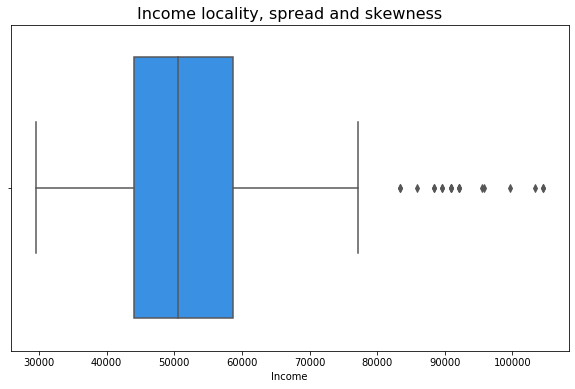

In [72]:
plt.figure(figsize=(10,6))
sns.boxplot(data = df, x = 'Income', color = 'dodgerblue')
plt.title('Income locality, spread and skewness', fontsize = 16)
plt.show()

Median income of users is around 51,000 dollars. There are several outliers in the data, all of them more than 80,000 dollars.

In [65]:
df['Income'].describe()

count       180.000000
mean      53719.577778
std       16506.684226
min       29562.000000
25%       44058.750000
50%       50596.500000
75%       58668.000000
max      104581.000000
Name: Income, dtype: float64

Exact median income - 50,596.5 dollars ; Mean - 53,719 ; Minimum - 29,562 ; Maximum - 104,581

In [92]:
# Percentage difference b/w mean and median - abs(mean - median)/median * 100
(abs(df['Income'].median() - df['Income'].mean())/df['Income'].median())*100

6.17251742270271

The mean is 6.17% greater than median possibly because of outliers.

In [96]:
df.loc[df['Income'] < 80000 , 'Income'].describe()

count      161.000000
mean     49119.180124
std       9920.297826
min      29562.000000
25%      43206.000000
50%      48891.000000
75%      54576.000000
max      77191.000000
Name: Income, dtype: float64

Mean after removing the outliers is only 49,119. Significantly less compared to 53,719.

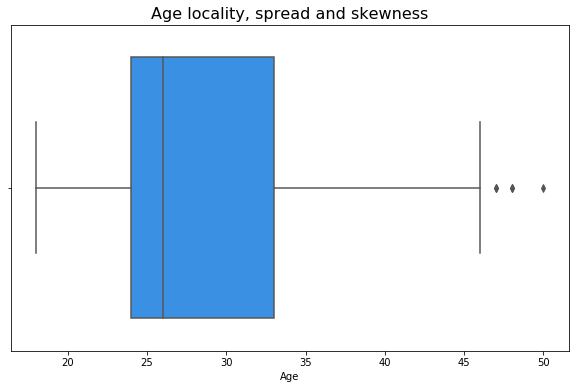

In [74]:
plt.figure(figsize = (10,6))
sns.boxplot(data=df, x='Age', color = 'dodgerblue')
plt.title('Age locality, spread and skewness', fontsize = 16)
plt.show()

Median age is around 26 years. There are some outliers more than 46 years.

In [69]:
df['Age'].describe()

count    180.000000
mean      28.788889
std        6.943498
min       18.000000
25%       24.000000
50%       26.000000
75%       33.000000
max       50.000000
Name: Age, dtype: float64

Exact median age - 26.0 ; Mean - 28.79 ; Minimum - 18 ; Maximum - 50

In [93]:
# Perentage difference b/w mean and median -
(abs(df['Age'].mean() - df['Age'].median())/df['Age'].median())*100

10.726495726495724

Mean is 10.72 percent greater then median possibly because of outliers.

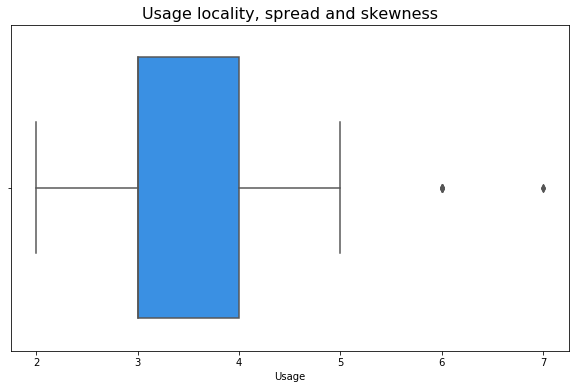

In [79]:
plt.figure(figsize=(10,6))
sns.boxplot(data = df, x='Usage', color = 'dodgerblue')
plt.title('Usage locality, spread and skewness', fontsize = 16)
plt.show()

Median expected weekly usage is 3 times. There are 2 outliers - 6 and 7 times.

In [77]:
df['Usage'].describe()

count    180.000000
mean       3.455556
std        1.084797
min        2.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        7.000000
Name: Usage, dtype: float64

Median usage - 3.0 ; Mean - 3.45 ; Minimum - 2.0 ; Maximum - 7.0

In [94]:
# Perentage difference b/w mean and median -
(abs(df['Usage'].mean() - df['Usage'].median())/df['Usage'].median())*100

15.18518518518519

Mean is 15.18% greater than median possibly because of outliers.

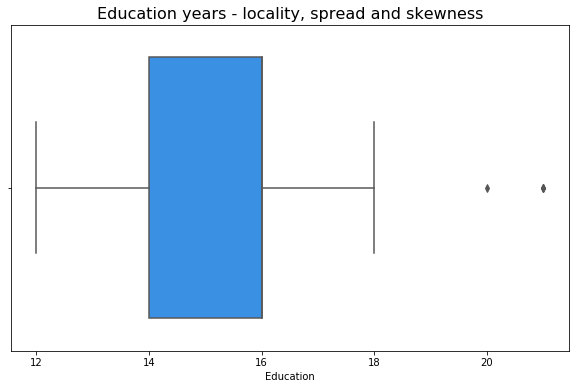

In [106]:
plt.figure(figsize=(10,6))
sns.boxplot(data = df, x = 'Education', color = 'dodgerblue')
plt.title('Education years - locality, spread and skewness', fontsize = 16)
plt.show()

Median education is 16 years. There are 2 outliers more than 18 years.

In [82]:
df['Education'].describe()

count    180.000000
mean      15.572222
std        1.617055
min       12.000000
25%       14.000000
50%       16.000000
75%       16.000000
max       21.000000
Name: Education, dtype: float64

Exact median education - 16.0; Mean - 15.57 ; Minimum - 12.0 years ; Maximum - 21.0 years

In [95]:
# Perentage difference b/w mean and median -
(abs(df['Education'].mean() - df['Education'].median())/df['Education'].median())*100

2.673611111111107

Mean is 2.67% lesser than median. But this is not because of outliers since they are only increasing the mean.

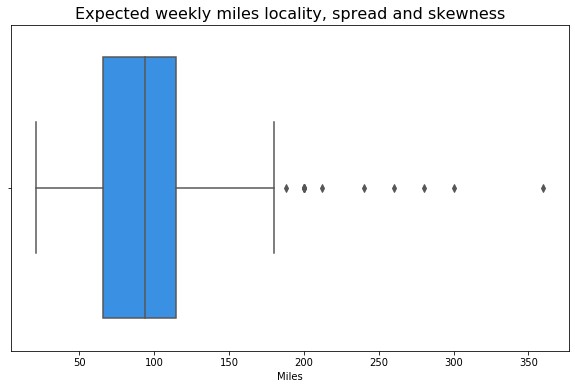

In [89]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x = 'Miles', color = 'dodgerblue')
plt.title('Expected weekly miles locality, spread and skewness', fontsize=16)
plt.show()

Median expected miles per week is around 95 miles. There are around 9 outliers - more than 175 miles.

In [90]:
df['Miles'].describe()

count    180.000000
mean     103.194444
std       51.863605
min       21.000000
25%       66.000000
50%       94.000000
75%      114.750000
max      360.000000
Name: Miles, dtype: float64

In [97]:
# Perentage difference b/w mean and median -
(abs(df['Miles'].mean() - df['Miles'].median())/df['Miles'].median())*100

9.781323877068557

Mean is 9.78% greater than median, possibly because of outliers.

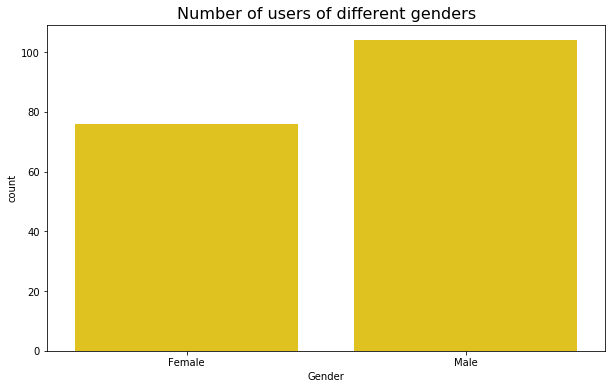

In [87]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x = 'Gender', color = 'gold')
plt.title('Number of users of different genders', fontsize=16)
plt.show()

There are significantly more male users than female users.

In [107]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles', 'income_bins', 'miles_bins'],
      dtype='object')

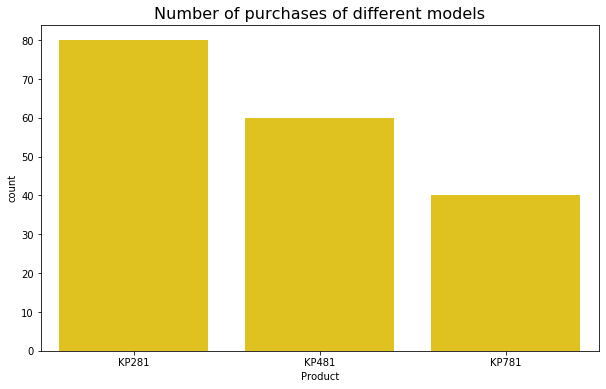

In [108]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x = 'Product', color = 'gold')
plt.title('Number of purchases of different models', fontsize=16)
plt.show()

KP281 is the most sold treadmill, followed by KP481, follwed by KP781.

Note -
- The KP281 is an entry-level treadmill that sells for 1,500 dollars.
- The KP481 is for mid-level runners that sell for 1,750 dollars.
- The KP781 treadmill is having advanced features that sell for 2,500 dollars.

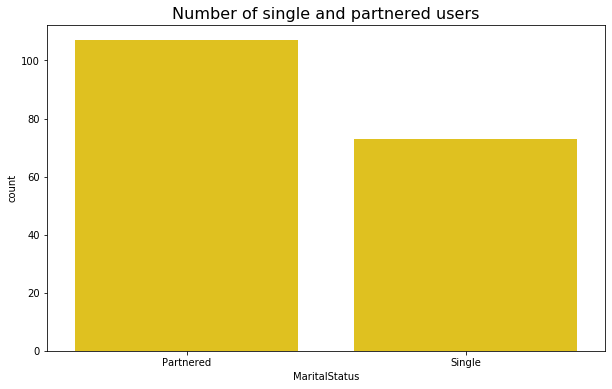

In [109]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x = 'MaritalStatus', color = 'gold')
plt.title('Number of single and partnered users', fontsize=16)
plt.show()

Number of partnered users is significantly higher than single users.

In [110]:
df['Age'].min(), df['Age'].max()

(18, 50)

In [115]:
df['age_bins'] = pd.cut(df['Age'], bins = [17, 25, 30, 35, 40, 45, 50])

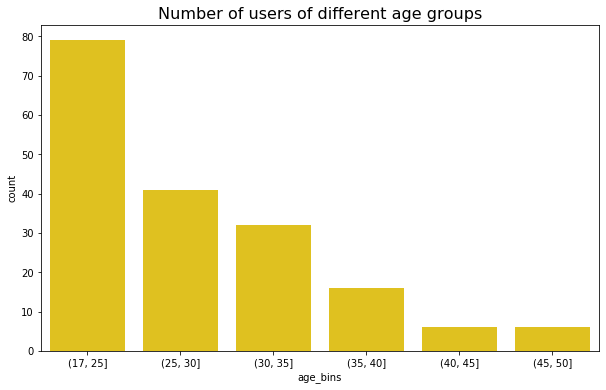

In [116]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x = 'age_bins', color = 'gold')
plt.title('Number of users of different age groups', fontsize=16)
plt.show()

Age-group (17,25] has maximum users. The number of users keeps decresing with increase in age.

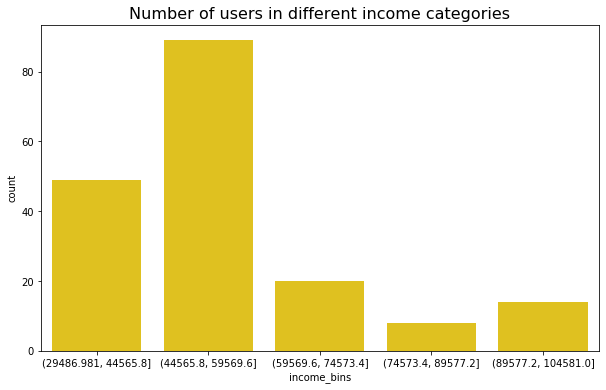

In [127]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x = 'income_bins', color = 'gold')
plt.title('Number of users in different income categories', fontsize=16)
plt.show()

Maximum number of purchases were made by users with income b/w (44565.8, 59569.6]. Second maximum by (29486, 44565].

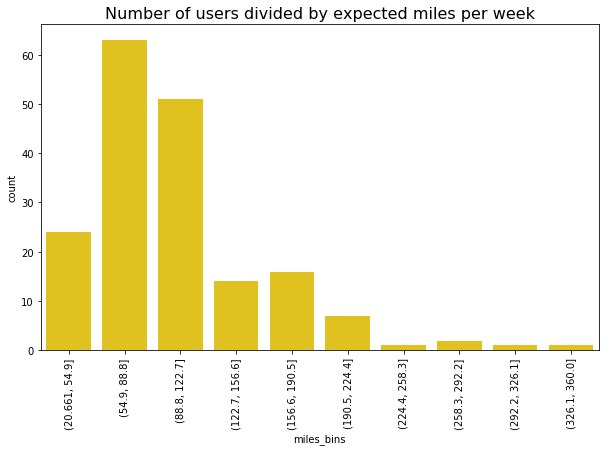

In [126]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x = 'miles_bins', color = 'gold')
plt.title('Number of users divided by expected miles per week', fontsize=16)
plt.xticks(rotation=90)
plt.show()

We divide the miles column into 10 equal bins to observe-
Users who expected to walk/run b/w (54.9, 88.8] miles per are maximum in number, followed by those who expected (88.8, 122.7].

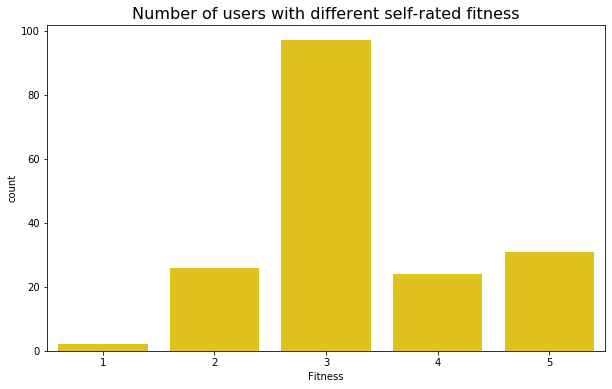

In [128]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x = 'Fitness', color = 'gold')
plt.title('Number of users with different self-rated fitness', fontsize=16)
plt.show()

Maximum number of users rated themselves 3/5 in terms of fitness, followed by 5/5, followed by 2/5 and 4/5.

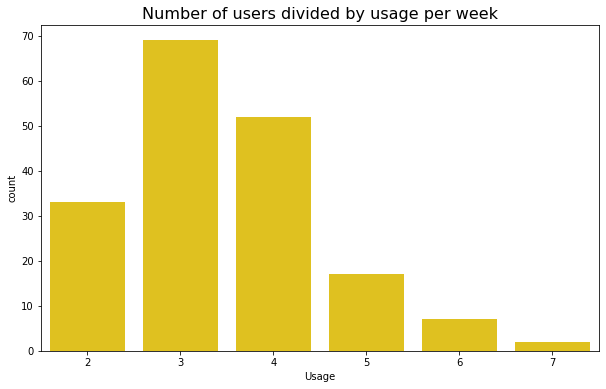

In [129]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x = 'Usage', color = 'gold')
plt.title('Number of users divided by usage per week', fontsize=16)
plt.show()

Maximum number of users expect to use the treadmill 3 times a week, followed by users of expect to use it 4 times a week.

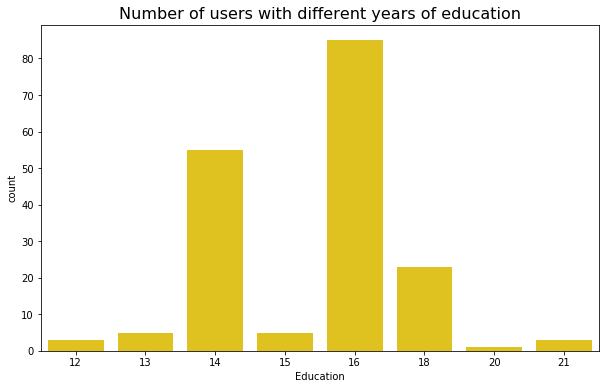

In [130]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x = 'Education', color = 'gold')
plt.title('Number of users with different years of education', fontsize=16)
plt.show()

Maximum number of users have 16 years of education, followed by 14 years, followed by 18 years.

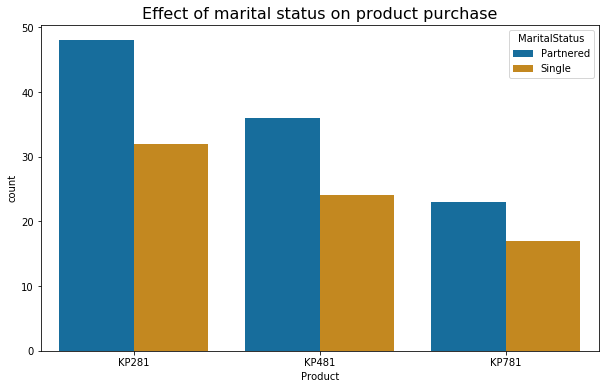

In [140]:
plt.figure(figsize=(10,6))
sns.countplot(data = df, x = 'Product', hue = 'MaritalStatus', palette='colorblind')
plt.title('Effect of marital status on product purchase', fontsize=16)
plt.show()

Both partnered and single users purchase KP281 treadmill more often than other two models.

In [143]:
temp = df.groupby(['age_bins', 'Product'])['Product'].agg(age_product_count = ('Product','count')).reset_index()
temp

,age_bins,Product,age_product_count
0,"(17, 25]",KP281,34
1,"(17, 25]",KP481,28
2,"(17, 25]",KP781,17
3,"(25, 30]",KP281,21
4,"(25, 30]",KP481,7
5,"(25, 30]",KP781,13
6,"(30, 35]",KP281,11
7,"(30, 35]",KP481,17
8,"(30, 35]",KP781,4
9,"(35, 40]",KP281,8


In [155]:
temp2 = temp.pivot(index = 'age_bins', columns = 'Product', values = 'age_product_count')
# temp2 = temp2.drop(['Product'], axis=1)
temp2.columns.name = None
temp2

,KP281,KP481,KP781
age_bins,,,
"(17, 25]",34,28,17
"(25, 30]",21,7,13
"(30, 35]",11,17,4
"(35, 40]",8,6,2
"(40, 45]",3,1,2
"(45, 50]",3,1,2


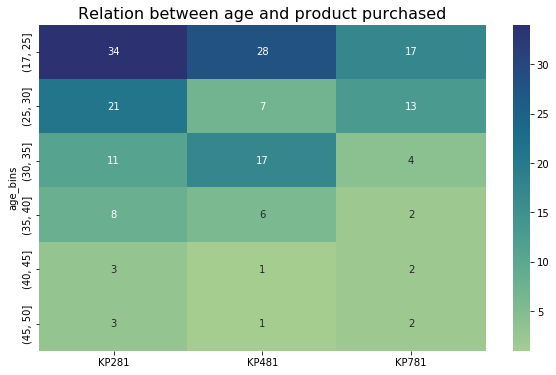

In [158]:
plt.figure(figsize=(10,6))
sns.heatmap(data = temp2, annot = True, cmap = 'crest')
plt.title('Relation between age and product purchased', fontsize=16)
plt.show()

Products most perferred by age groups -
- (17,25] -    KP281
- (25,30] -    KP281
- (30,35] -    KP481

Converting gender, marital status and product into numerical data-

In [215]:
df['gender_num'] = (df['Gender'] == 'Female').astype('int')

In [216]:
df['marital_status_num'] = (df['MaritalStatus'] == 'Single').astype('int')

In [210]:
temp = []
for i in df['Product']:
    if i == 'KP281':
        temp.append(1)
    elif i == 'KP481':
        temp.append(2)
    else:
        temp.append(3)
df['product_num'] = temp

In [218]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,income_bins,miles_bins,age_bins,marital_status_num,gender_num,product_num
0,KP281,18,Male,14,Single,3,4,29562,112,"(29486.981, 44565.8]","(88.8, 122.7]","(17, 25]",1,0,1
1,KP281,19,Male,15,Single,2,3,31836,75,"(29486.981, 44565.8]","(54.9, 88.8]","(17, 25]",1,0,1
2,KP281,19,Female,14,Partnered,4,3,30699,66,"(29486.981, 44565.8]","(54.9, 88.8]","(17, 25]",0,1,1
3,KP281,19,Male,12,Single,3,3,32973,85,"(29486.981, 44565.8]","(54.9, 88.8]","(17, 25]",1,0,1
4,KP281,20,Male,13,Partnered,4,2,35247,47,"(29486.981, 44565.8]","(20.661, 54.9]","(17, 25]",0,0,1


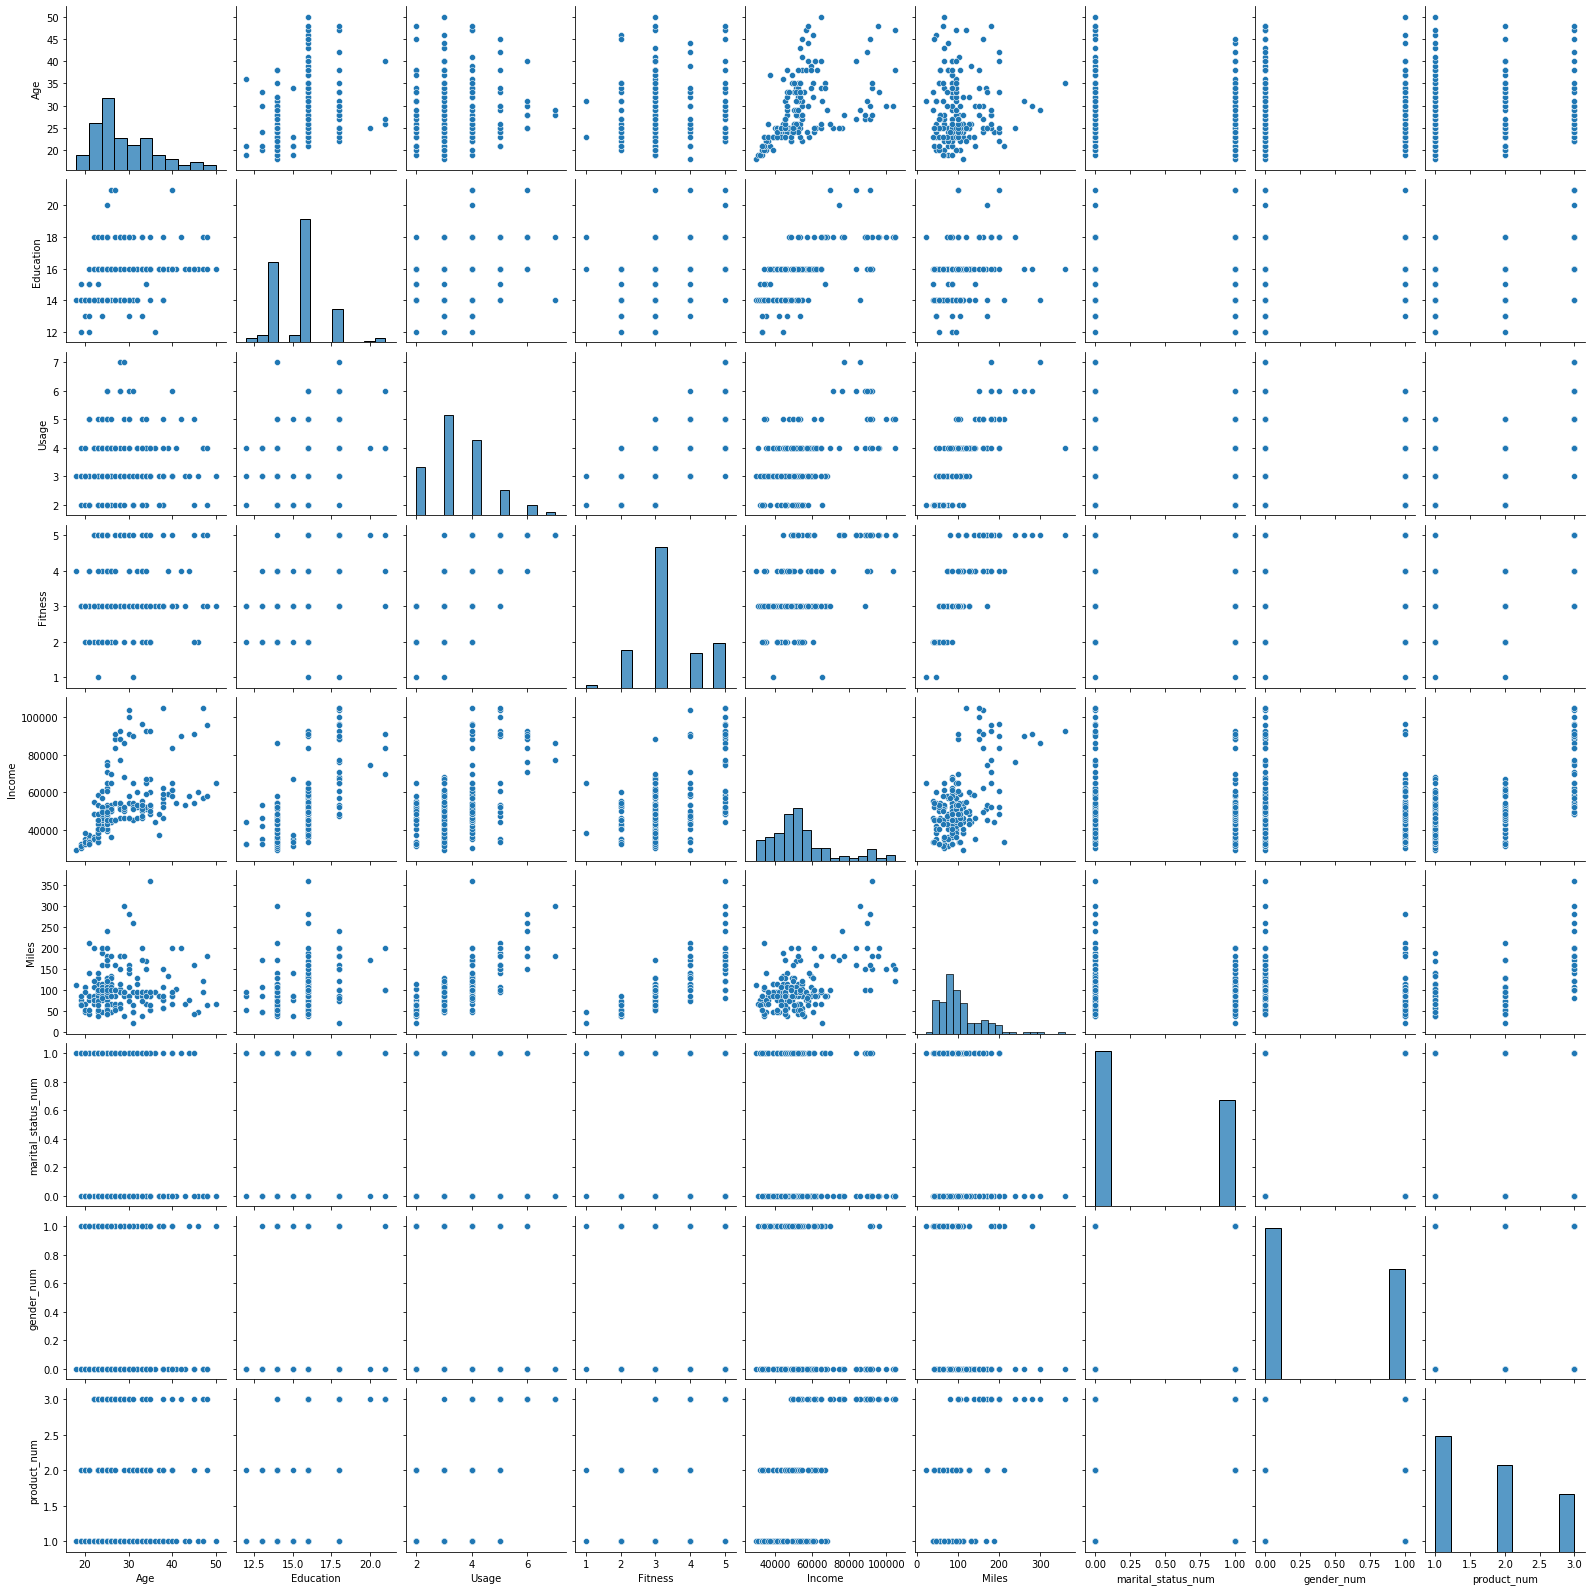

In [217]:
sns.pairplot(df)
plt.show()

In [212]:
df.corr()

,Age,Education,Usage,Fitness,Income,Miles,marital_status_num,gender_num,product_num
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618,-0.192152,-0.027544,0.032225
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284,-0.068569,-0.094089,0.495018
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130,0.007786,-0.214424,0.537447
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702,0.050751,-0.254609,0.594883
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473,-0.150293,-0.202053,0.624168
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000,-0.025639,-0.217869,0.571596
marital_status_num,-0.192152,-0.068569,0.007786,0.050751,-0.150293,-0.025639,1.000000,-0.018836,0.017602
gender_num,-0.027544,-0.094089,-0.214424,-0.254609,-0.202053,-0.217869,-0.018836,1.000000,-0.230653
product_num,0.032225,0.495018,0.537447,0.594883,0.624168,0.571596,0.017602,-0.230653,1.000000


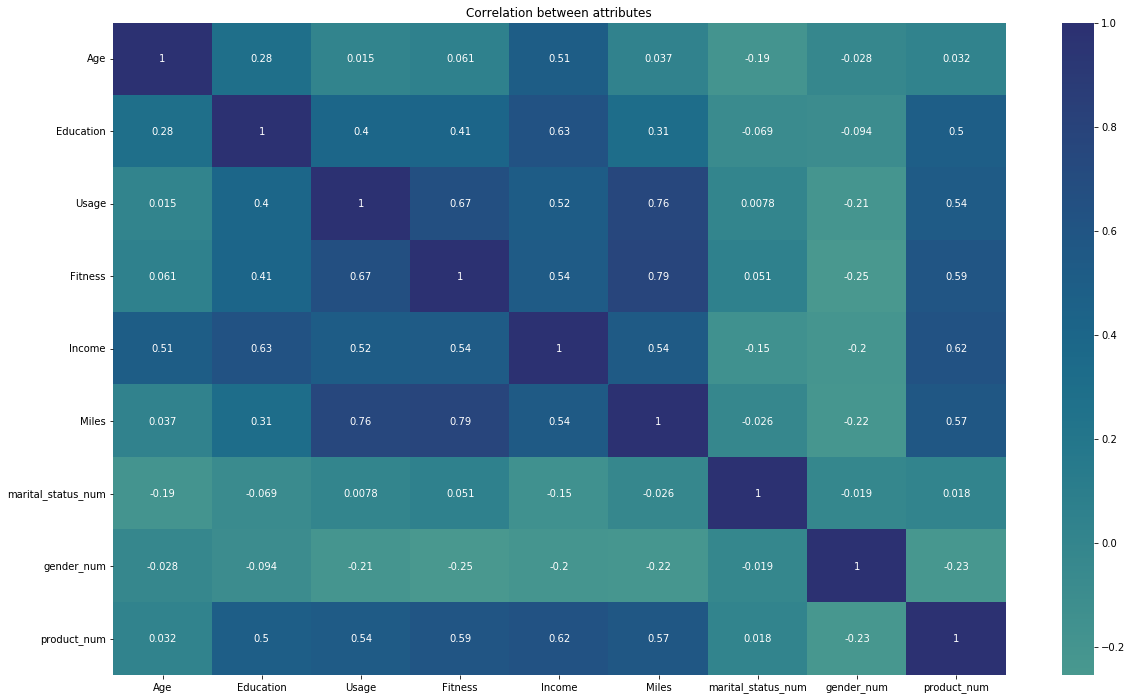

In [224]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(), annot= True, center = 0, cmap = 'crest')
plt.title('Correlation between attributes')
plt.show()

There seems to be a strong correlation between - 
- product(product_num) and income (0.62)
- product(product_num) and fitness (0.59)

# Probabilities

Marginal probabilities -

In [178]:
temp2 = df.groupby('Product')['Product'].agg(count = ('Product','count'))
temp2

,count
Product,
KP281,80
KP481,60
KP781,40


In [182]:
marg_probs = temp2/df.shape[0]
marg_probs.rename(columns = {'count':'Probability'}, inplace=True)
marg_probs

,Probability
Product,
KP281,0.444444
KP481,0.333333
KP781,0.222222


The above table shows marginal probability of each product.

In [231]:
temp = pd.crosstab(index = df['Product'], columns = df['MaritalStatus'])
temp = temp/180
temp

MaritalStatus,Partnered,Single
Product,,
KP281,0.266667,0.177778
KP481,0.200000,0.133333
KP781,0.127778,0.094444


We can see the probability of -
- Partnered ∩ KP281
- Partnered ∩ KP481
- Partnered ∩ KP781
- Single ∩ KP281
- Single ∩ KP481
- Single ∩ KP781

In [245]:
temp = pd.crosstab(index = df['Product'], columns = df['age_bins'])/180
temp

age_bins,"(17, 25]","(25, 30]","(30, 35]","(35, 40]","(40, 45]","(45, 50]"
Product,,,,,,
KP281,0.188889,0.116667,0.061111,0.044444,0.016667,0.016667
KP481,0.155556,0.038889,0.094444,0.033333,0.005556,0.005556
KP781,0.094444,0.072222,0.022222,0.011111,0.011111,0.011111


Here we can see the probabilty of-
- (17, 25] ∩ KP281
- (25, 30] ∩ KP281
- (30, 35] ∩ KP281
etc.

In [246]:
temp.sum(axis=0)

age_bins
(17, 25]    0.438889
(25, 30]    0.227778
(30, 35]    0.177778
(35, 40]    0.088889
(40, 45]    0.033333
(45, 50]    0.033333
dtype: float64

In [247]:
0.439 + 0.228 + 0.188

0.855

Users of ages 17-35 make around 85.5% of total purchases.

In [239]:
pd.crosstab(index = df['Product'], columns = df['income_bins'])/180

income_bins,"(29486.981, 44565.8]","(44565.8, 59569.6]","(59569.6, 74573.4]","(74573.4, 89577.2]","(89577.2, 104581.0]"
Product,,,,,
KP281,0.188889,0.222222,0.033333,0.000000,0.000000
KP481,0.083333,0.211111,0.038889,0.000000,0.000000
KP781,0.000000,0.061111,0.038889,0.044444,0.077778


Here we can see the probabilty of-
- (29486.981, 44565.8] ∩ KP281
- (44565.8, 59569.6] ∩ KP281
- (59569.6, 74573.4] ∩ KP281
etc.

In [248]:
(pd.crosstab(index = df['Product'], columns = df['income_bins'])/180).sum(axis=0)

income_bins
(29486.981, 44565.8]    0.272222
(44565.8, 59569.6]      0.494444
(59569.6, 74573.4]      0.111111
(74573.4, 89577.2]      0.044444
(89577.2, 104581.0]     0.077778
dtype: float64

In [249]:
0.272 + 0.494

0.766

People with income in range (29486.981, 59569.6] make 76.6% of the purchases.

In [241]:
pd.crosstab(index = df['Product'], columns = df['Gender'], normalize = 'all')

Gender,Female,Male
Product,,
KP281,0.222222,0.222222
KP481,0.161111,0.172222
KP781,0.038889,0.183333


Here we can see the probabilty of-
- Female ∩ KP281
- Female ∩ KP481
- Male ∩ KP281
etc.

In [242]:
pd.crosstab(index = df['Product'], columns = df['Fitness'], normalize = 'all')

Fitness,1,2,3,4,5
Product,,,,,
KP281,0.005556,0.077778,0.300000,0.050000,0.011111
KP481,0.005556,0.066667,0.216667,0.044444,0.000000
KP781,0.000000,0.000000,0.022222,0.038889,0.161111


Here we can see the probabilty of-
- Fitness=1 ∩ KP281
- Fitness=1 ∩ KP481
- Fitness=1 ∩ KP781
etc.

In [243]:
pd.crosstab(index = df['Product'], columns = df['Usage'], normalize = 'all')

Usage,2,3,4,5,6,7
Product,,,,,,
KP281,0.105556,0.205556,0.122222,0.011111,0.000000,0.000000
KP481,0.077778,0.172222,0.066667,0.016667,0.000000,0.000000
KP781,0.000000,0.005556,0.100000,0.066667,0.038889,0.011111


Here we can see the probabilty of-
- Usage=2 ∩ KP281
- Usage=2 ∩ KP481
- Usage=2 ∩ KP781
etc.

Now, conditional probabilities-

In [226]:
# Probabilities of purchasing different products given their income range-
temp = pd.crosstab(index = df['Product'], columns = df['income_bins'], normalize = 'columns')
temp

income_bins,"(29486.981, 44565.8]","(44565.8, 59569.6]","(59569.6, 74573.4]","(74573.4, 89577.2]","(89577.2, 104581.0]"
Product,,,,,
KP281,0.693878,0.449438,0.30,0.0,0.0
KP481,0.306122,0.426966,0.35,0.0,0.0
KP781,0.000000,0.123596,0.35,1.0,1.0


Above table shows probabilities of purchasing a product given user's income range.

In [229]:
# Probabilities of purchasing different products given their marital status-
pd.crosstab(index = df['Product'], columns = df['MaritalStatus'], normalize = 'columns')

MaritalStatus,Partnered,Single
Product,,
KP281,0.448598,0.438356
KP481,0.336449,0.328767
KP781,0.214953,0.232877


Above table shows probabilities of purchasing a product given user's marital status.

In [230]:
# Probabilities of purchasing different products given their gender-
pd.crosstab(index = df['Product'], columns = df['Gender'], normalize = 'columns')

Gender,Female,Male
Product,,
KP281,0.526316,0.384615
KP481,0.381579,0.298077
KP781,0.092105,0.317308


In [233]:
# Probabilities of purchasing different products given their fitness-
pd.crosstab(index = df['Product'], columns = df['Fitness'], normalize = 'columns')

Fitness,1,2,3,4,5
Product,,,,,
KP281,0.5,0.538462,0.556701,0.375000,0.064516
KP481,0.5,0.461538,0.402062,0.333333,0.000000
KP781,0.0,0.000000,0.041237,0.291667,0.935484


In [234]:
# Probabilities of purchasing different products given their age-
pd.crosstab(index = df['Product'], columns = df['age_bins'], normalize = 'columns')

age_bins,"(17, 25]","(25, 30]","(30, 35]","(35, 40]","(40, 45]","(45, 50]"
Product,,,,,,
KP281,0.43038,0.512195,0.34375,0.500,0.500000,0.500000
KP481,0.35443,0.170732,0.53125,0.375,0.166667,0.166667
KP781,0.21519,0.317073,0.12500,0.125,0.333333,0.333333


In [236]:
# Probabilities of purchasing different products given their usage-
pd.crosstab(index = df['Product'], columns = df['Usage'], normalize = 'columns')

Usage,2,3,4,5,6,7
Product,,,,,,
KP281,0.575758,0.536232,0.423077,0.117647,0.0,0.0
KP481,0.424242,0.449275,0.230769,0.176471,0.0,0.0
KP781,0.000000,0.014493,0.346154,0.705882,1.0,1.0


In [237]:
# Probabilities of purchasing different products given miles per week-
pd.crosstab(index = df['Product'], columns = df['Miles'], normalize = 'columns')

Miles,21,38,42,47,53,56,64,66,74,75,...,170,180,188,200,212,240,260,280,300,360
Product,,,,,,,,,,,,,,,,,,,,,
KP281,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
KP481,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.666667,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
KP781,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.333333,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0


In [238]:
# Probabilities of purchasing different products given their education-
pd.crosstab(index = df['Product'], columns = df['Education'], normalize = 'columns')

Education,12,13,14,15,16,18,20,21
Product,,,,,,,,
KP281,0.666667,0.6,0.545455,0.8,0.458824,0.086957,0.0,0.0
KP481,0.333333,0.4,0.418182,0.2,0.364706,0.086957,0.0,0.0
KP781,0.000000,0.0,0.036364,0.0,0.176471,0.826087,1.0,1.0


In [232]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,income_bins,miles_bins,age_bins,marital_status_num,gender_num,product_num
0,KP281,18,Male,14,Single,3,4,29562,112,"(29486.981, 44565.8]","(88.8, 122.7]","(17, 25]",1,0,1
1,KP281,19,Male,15,Single,2,3,31836,75,"(29486.981, 44565.8]","(54.9, 88.8]","(17, 25]",1,0,1
2,KP281,19,Female,14,Partnered,4,3,30699,66,"(29486.981, 44565.8]","(54.9, 88.8]","(17, 25]",0,1,1
3,KP281,19,Male,12,Single,3,3,32973,85,"(29486.981, 44565.8]","(54.9, 88.8]","(17, 25]",1,0,1
4,KP281,20,Male,13,Partnered,4,2,35247,47,"(29486.981, 44565.8]","(20.661, 54.9]","(17, 25]",0,0,1


# Customer Profiling

1. Income based-
    - (29486.981, 44565.8] - Probability of buying KP281 is highest (69.4%)
    - (74573.4, inf) - Probability of buying KP781 is highest (100%)
2. Marital Status based-
    - Partnered - Probability of buying KP281 is highest (44.9%).
    - Single - Probability of buying KP281 is highest (43.8%).
3. Gender Based-
    - Female - Prob of buying KP281 is highest(52.6%) and prob of buying KP781 is very low (9%)
    - Male - Prob of buying KP281 is highest (38.5%) but prob of buying other two models are also comparable.
4. Age based-
    - (17,25] - Probability of buying KP281 is highest (43%)
    - (25,30] - Prob of buying KP281 is highest (51.2%)
    - (30,35] - Prob of buying KP481 is highest (53.1%)
    - (35,50] - Prob of buying KP281 is highest (50%)
5. Fitness based-
    - 1 & 2 - Probability of buying KP781 is 0%
    - 3 - Prob of buying KP281 is highest (55.7%)
    - 4 - Prob of buying KP281 is highest (37.5%)
    - 5 - Prob of buying KP781 is highest (93.5%)
6. Usage based -
    - 2 to 4 times per week - Probability of buying KP281 is highest (57.6%, 53.6%, 42.3% respectiely)
    - 5 to 7 times per week - Probability of buying KP781 is highest (70.6%, 100%, 100% respectively)


# Insights and Recommendations

Insights -
    1. Users of ages 17-35 make around 85.5% of total purchases.
    2. People with income in range (29486.981, 59569.6] make 76.6% of the purchases.
    3. People with income in range (29486.981, 44565.8] will purchase the KP281 69.4% of the times.
    4. User with income greater than 74,573 dollars will almost certainly purchase the KP781 model.
    5. Females will purchase the KP281 52.6% of the times.
    6. Person with age in range 30-35 will purchase KP481 53.1% of the times.
    7. Person who rates herself 5/5 in fitness will purchase KP781 93.5% of the times.
    8. People with  usage <= 4 times a week are likely to purchase KP281 whereas people with usage >=5 are highly likely to purchase KP781.

Recommendations-
    1. Target ads towards people in the age group 17-35 since they make 85.5% of the purchases.
    2. If a user earns more than 74,573 dollars, show her the KP781 first.
    3. If user's income is in range (29486.981, 44565.8], show her the KP281 first.
    4. If a person plans to use the treadmill 5 or more times a week, show her the KP781 first.